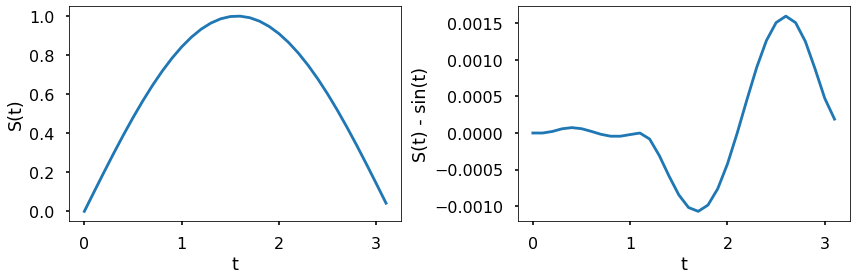

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

In [2]:
#  displays plots directly in this notebook as images
%matplotlib inline
import numpy as np       # the NumPy library for fast matrix and vector data types and math operations
from numpy import sqrt, sin, cos, pi,e
import matplotlib.pyplot as plt   # functions for plotting, loaded under a convenient name alias 'plt'
import scipy
from scipy import constants
import math
import pandas as pd


In [5]:
f=37.5*10**9 # частота зондирования
R=0.1 # радиус зондируемой плазмы
b=2*R # максимальный радиус плазмы
pi=constants.pi
me=constants.m_e # electron mass
c=constants.speed_of_light # speed of light in vacuum
e0=constants.epsilon_0 # the electric constant (vacuum permittivity)
q=constants.e  # elementary charge
γ=2 # некая вспомогательная костанта
λ=constants.nu2lambda(f) # перевод частоты в длинну волны 
ω=f*2*pi # угловая частота
Nc=me*(pi**2)*4*(f**2)*e0*(10**-6)/(q**2)
Nm=Nc/1.1
ωm=math.sqrt(Nm*(q**2)/(me*e0))

numbers = [f,R,b,f,me,c,e0,q,γ,λ,ω,Nc,Nm,ωm] # распечатать все константы в столбец (in scientific notation)                                                                                                                                                                                          
#for x1 in numbers:                                                                                                                                                                               
    #print("{:e}".format(x1))
k=list(range(1,13,1)) # создает массив от 1 до 12
#k

In [6]:
α1=[]
for n in range(len(k)) : 
    a1=(n+1)*pi/180
    α1.append(a1)
α2=[]
for n in range(len(k)) : 
    if b*(math.sin(a1))<R:
        a2=(pi-math.asin(b*math.sin((n+1)*pi/180))/R)
        α2.append(a2)
    elif b<=R:
        a2=n*3
        α2.append(a2)
    else:
        a2=n*0
        α2.append(a2)
βk=[]
for n in range(len(k)) :
    β=pi-α1[n]-α2[n]
    βk.append(β)
θk=[]
for n in range(len(k)) :
    θ=pi-βk[n]
    θk.append(θ)
Φk=[]
for n in range(len(k)) :
    Φ=α1[n]+βk[n]
    Φk.append(Φ)

In [10]:
import sympy
from sympy import symbols, solve
ak=[]
for n in range(len(k)) :
    r0 = symbols('r0')
    expr = 1-(Nm*(1-(r0/R)**γ)/Nc)-((R**2)/(r0**2))*(math.sin(Φk[n]))**2
    sol = solve(expr)
    ak.append(sol)
ak1=[]
for i in range(len(k)) :
    ak[i] = [n for n in ak[i] if n.is_real]
    ak[i] = [n for n in ak[i] if n.is_positive]
    ak1.append(ak[i])
a = np.array(ak1, dtype=np.float32)

# Задать функцию f(r) 
fresalts=[]
for i in range(len(k)) :
    def f(r):
        return (1-(Nm*(1-(r/R)**γ)/Nc)-((R**2)/(r**2))*(math.sin(Φk[i]))**2)
    fresalts.append(f(i+1))
#fresalts

#result = integrate.quad(lambda x: x**7, 2, 0), где lambda x по сути dx, x**7 - это подинтегральная функция,
#2 - нижний придел, 0 - верхний придел интегрирования, result = integrate.quad - по сути знак интеграла (метод)
import scipy.integrate as integrate #вызываем метод интегрирования
import scipy.special as special
Θk=[]
for i in range(len(k)) :
    Θ = integrate.quad(lambda r: R*sin(Φk[i])/(r**2*(f(r)**0.5)), a[i], 0.1)
    Θk.append(Θ[0]) #вписываем в массив Θk только н1-е корни каждого 
θ2k=[]
for n in range(len(k)) :
    θ2=θk[n]-np.abs(Θk[n]*2)
    θ2k.append(θ2)

C:\Users\YEVHEN~1\AppData\Local\Temp/ipykernel_7020/4130037559.py:30: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  Θ = integrate.quad(lambda r: R*sin(Φk[i])/(r**2*(f(r)**0.5)), a[i], 0.1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)



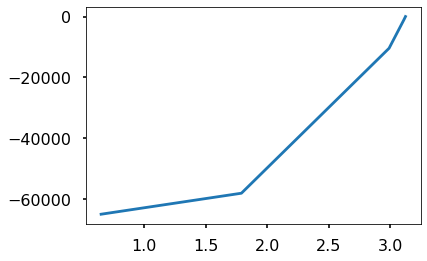

In [24]:
%matplotlib inline

F = lambda r, θ: (r**2)*((1-(Nm*(1-(r/R)**γ)/Nc)-((R**2)/(r**2))*(math.sin(Φk[0]))**2)**0.5)/(R*sin(Φk[0]))

#t_eval = np.arange(θk[0],θ2k[0],0.1)
sol = solve_ivp(F, [θk[0], θ2k[0]], [0.001])

#plt.figure(figsize = (12, 4))
#plt.subplot(121)
plt.plot(sol.t, sol.y[0])
#plt.xlabel('t')
#plt.ylabel('S(t)')
#plt.subplot(122)
#plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
#plt.xlabel('t')
#plt.ylabel('S(t) - sin(t)')
#plt.tight_layout()
#plt.show()